In [1]:
import pandas as pd
import json_tricks as json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/data/log/smallsig/rep00/analysis_log_19999.txt', delimiter="\t")
df.head()

,ind,cost,nbopp,owncoop,othercoop,score
0,0,0,0,0.813757,0.0,1.0
1,0,0,0,0.813757,0.5,1.0
2,0,0,0,0.813757,1.0,1.0
3,0,0,0,0.813757,1.5,1.0
4,0,0,0,0.813757,2.0,1.0


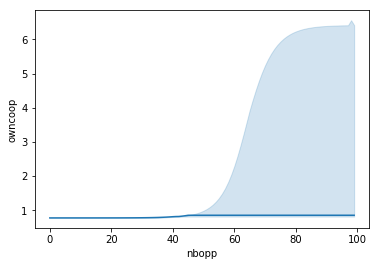

In [26]:
sns.lineplot(x='nbopp', y='owncoop', data=df.query('othercoop == 0 and cost == 0'), estimator=np.median)

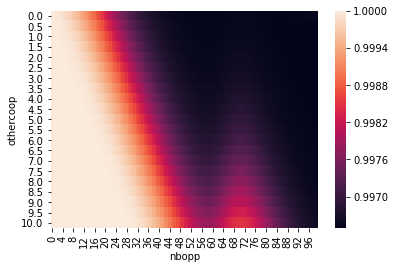

In [20]:
sns.heatmap(df.query('ind==42').pivot_table('score', 'othercoop', 'nbopp'))